# What this file does

The purpose of this file was to analyze buyouts by state, where I discovered a Simpsons paradox trend; while it seems like the overall numbers of buyouts in the country are decreasing, one a state by state basis trends aren't uniformly downward. (See: the northeast and its embrace of the program in recent years.) I also made a visualization of peak buyout years in various states so I could see how their utlization has changed over the years across the country — see https://kpananjady.github.io/my-portfolio2/cartogram.html

# Analyzing FEMA data for buyouts and getting it viz ready

In [ ]:
#libraries

In [9]:
import pandas as pd

In [36]:
!pip3 install matplotlib

     |████████████████████████████████| 13.2MB 1.6MB/s eta 0:00:01    |██████████████████████          | 9.1MB 585kB/s eta 0:00:08
     |████████████████████████████████| 122kB 28.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.3MB/s eta 0:00:01


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("fema (1).csv")

In [ ]:
# Just looking at NJ

In [3]:
df[df['State']=='NJ']

,ID,Fiscal Year,Disaster Description,Residence,Owner,Structure,Address,City,State,Zip,Price Paid,Status
12640,12766,1996,SEVERE STORMS AND FLOODING,NaN,NaN,NaN,2 WAYNE AVENUE,BRIDGEWATER,NJ,08807,NaN,Closed
12641,12767,1996,SEVERE STORMS AND FLOODING,NaN,NaN,NaN,3 WAYNE AVENUE,BRIDGEWATER,NJ,08807,NaN,Closed
12642,12768,1996,SEVERE STORMS AND FLOODING,NaN,NaN,NaN,6 WAYNE AVENUE,BRIDGEWATER,NJ,08807,NaN,Closed
14745,15055,1997,NaN,NaN,"JURDAO, JOSE & RAMONITA",Single Family,1794 ALLEN STREET,RAHWAY,NJ,07065,NaN,Closed
14746,15056,1997,NaN,NaN,"COLLINS, GLORIA J",Single Family,1804 ALLEN STREET,RAHWAY,NJ,07065,NaN,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
40703,43675,2016,NaN,NaN,"HANDL, GYORGY",Single Family,35 SHORE RD,WAYNE,NJ,07470,NaN,Obligated
40704,43676,2016,NaN,NaN,"LOMBARDO, JAMES",Single Family,38 NEW YORK AVE,WAYNE,NJ,07470,NaN,Obligated
40705,43677,2016,NaN,NaN,"KANG, MOON BACK",Single Family,60 MAPLE,WAYNE,NJ,07470,NaN,Obligated
40706,43678,2016,NaN,NaN,"DUBNICZKI, GEORGE",Single Family,64 FAIRFIELD RD,WAYNE,NJ,07470,NaN,Obligated


In [ ]:
#how many states?

In [5]:
len(df['State'].value_counts())

49

In [ ]:
#seems like a lot of utilization in states I didn't expect

In [6]:
df['State'].value_counts()


MO    5165
TX    3706
IL    3058
NC    2825
IA    2720
NJ    1848
GA    1651
OH    1641
PA    1501
KS    1310
AL    1250
IN    1250
WV    1248
ND    1191
KY    1148
MN    1095
TN    1020
LA     762
NY     711
WI     704
WA     601
MS     583
FL     542
NE     463
VA     461
OK     431
CA     270
MI     235
OR     177
VT     173
SD     161
MD     161
AZ     159
CO     148
ME     118
AR      94
NH      63
SC      58
ID      50
MT      48
CT      46
NV      29
MA      26
DE      26
UT      20
RI      18
WY      16
NM      13
AK      10
Name: State, dtype: int64

In [ ]:
#let's look by decade? Where's the northeast

In [20]:
df[df['Fiscal Year']==2000]['State'].value_counts()


NC    83
GA    74
OH    42
IL    40
WV    36
KS    36
WI    35
MN    29
MD    26
KY    24
MO    23
TX    17
VA    14
LA    11
AL    10
ND     8
NJ     7
PA     6
TN     6
OK     4
MS     4
IA     3
NE     3
IN     3
ME     2
NH     1
NY     1
VT     1
FL     1
Name: State, dtype: int64

In [ ]:
#and again

In [21]:
df[df['Fiscal Year']==2013]['State'].value_counts()


NJ    1007
CO      69
IA      47
WV      22
PA      17
KY      15
FL      14
CT      14
WI      12
MI      11
OH      11
MN      11
WA      10
TX       8
NC       8
VA       8
ND       7
GA       5
RI       5
LA       4
NY       3
MO       2
AR       1
MT       1
MD       1
NH       1
TN       1
Name: State, dtype: int64

In [ ]:
#list of states for easy iteration later

In [23]:
list_states = df['State'].unique().tolist()


In [24]:
list_states

['KY',
 'MN',
 'NC',
 'UT',
 'VT',
 'AL',
 'AR',
 'IN',
 'IA',
 'MO',
 'NH',
 'WI',
 'ME',
 'MA',
 'SC',
 'WA',
 'FL',
 'TX',
 'AZ',
 'IL',
 'KS',
 'NE',
 'ND',
 'OK',
 'SD',
 'CA',
 'GA',
 'LA',
 'MD',
 'MS',
 'PA',
 'TN',
 'VA',
 'OH',
 'WV',
 'ID',
 'NJ',
 'NY',
 'OR',
 'AK',
 'CO',
 'MT',
 'MI',
 'NV',
 'WY',
 'NM',
 'CT',
 'DE',
 'RI']

In [ ]:
#by state by year

In [44]:
df.groupby(by='State')['Fiscal Year'].value_counts().sort_index()

State  Fiscal Year
AK     1997             1
       2003             6
       2005             3
AL     1990            11
       1994            94
                     ... 
WV     2015           107
WY     1998            12
       1999             1
       2014             2
       2015             1
Name: Fiscal Year, Length: 674, dtype: int64

In [ ]:
#all the small multiples

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


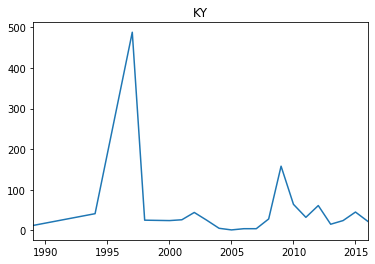

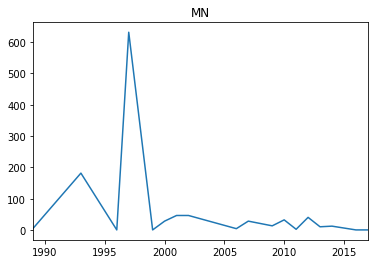

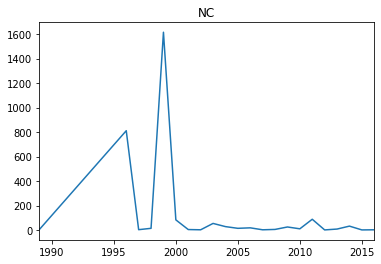

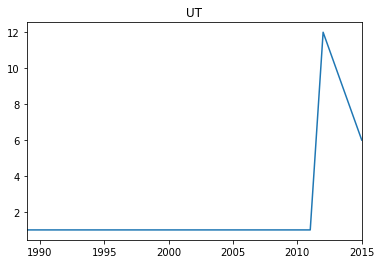

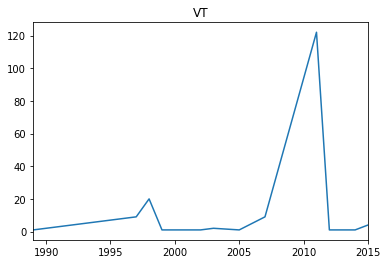

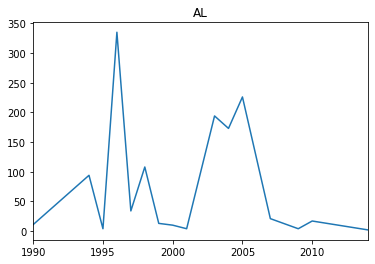

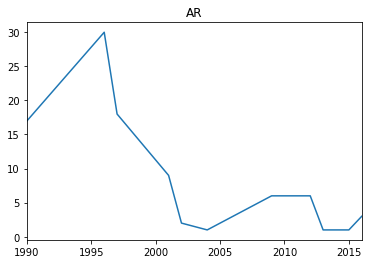

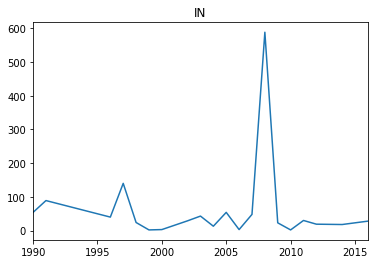

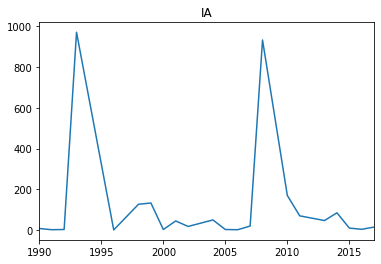

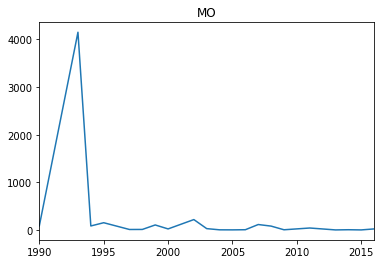

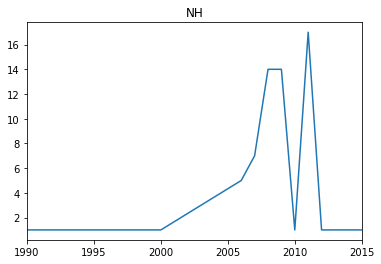

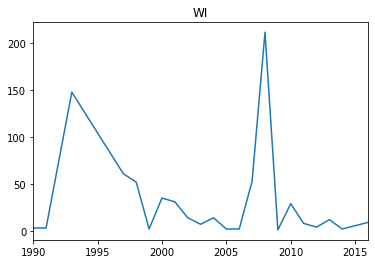

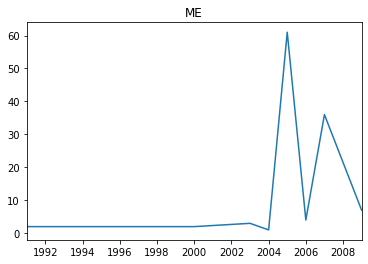

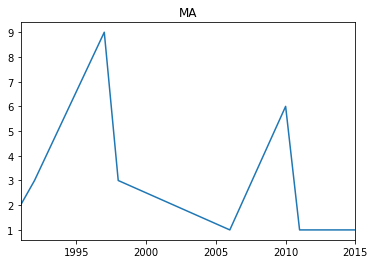

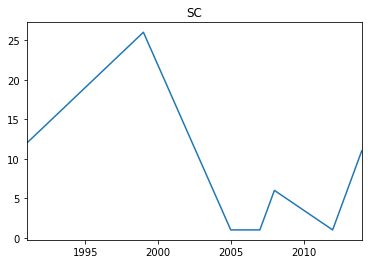

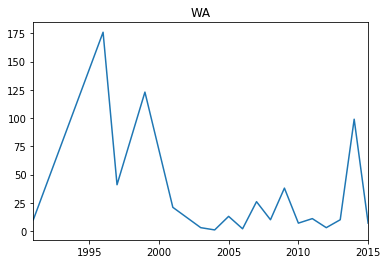

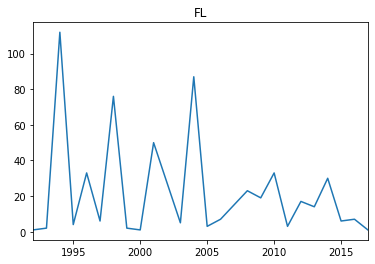

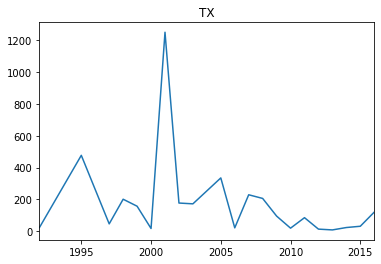

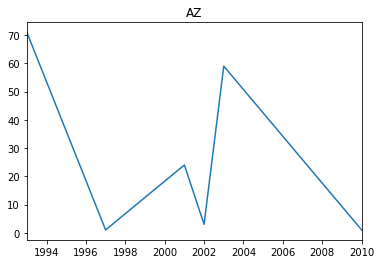

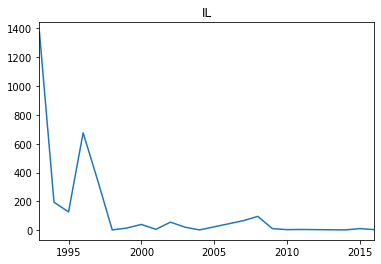

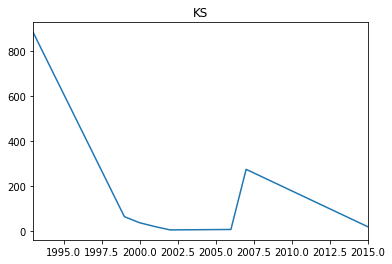

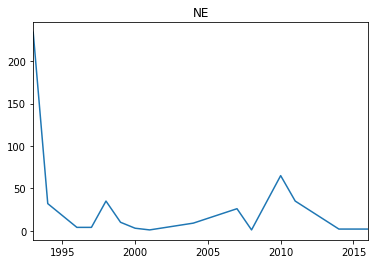

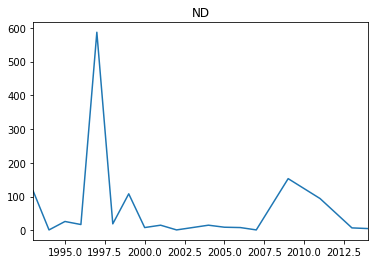

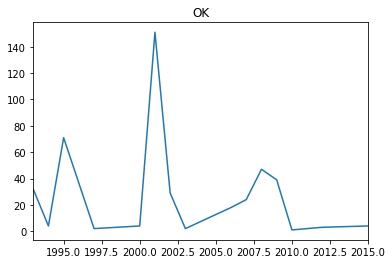

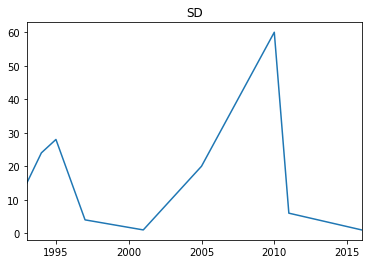

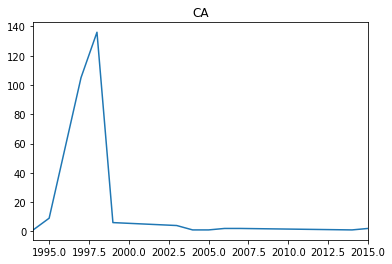

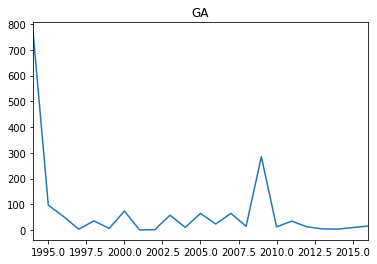

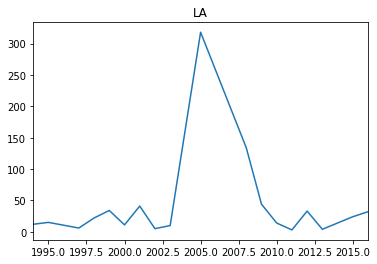

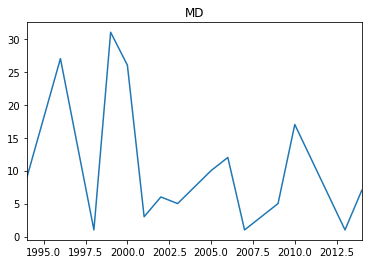

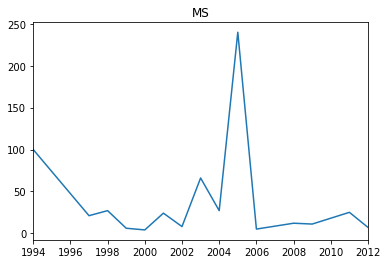

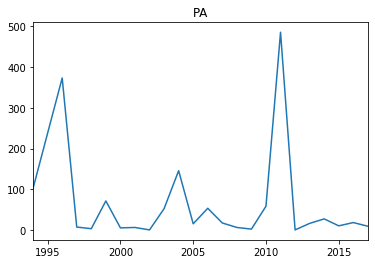

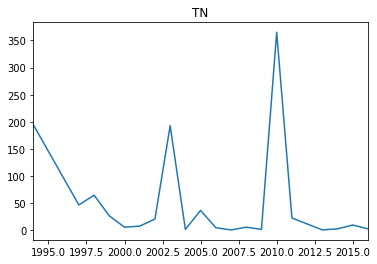

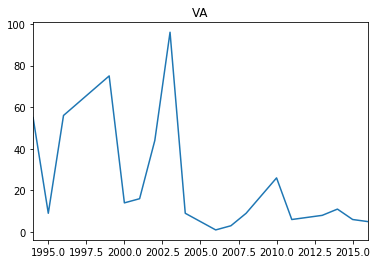

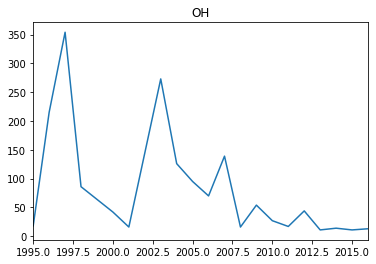

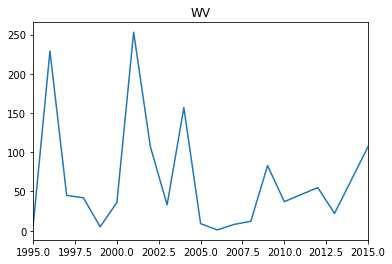

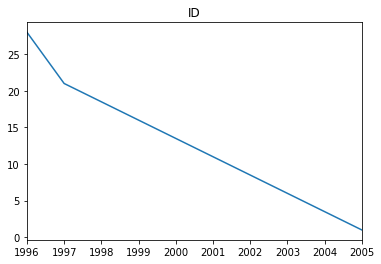

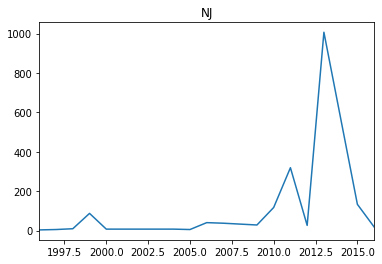

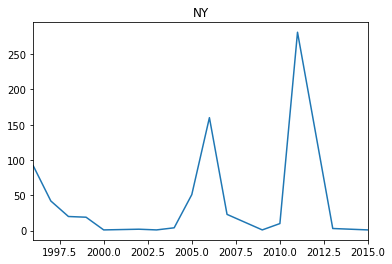

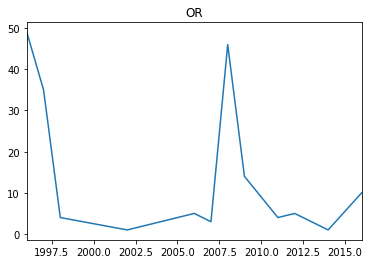

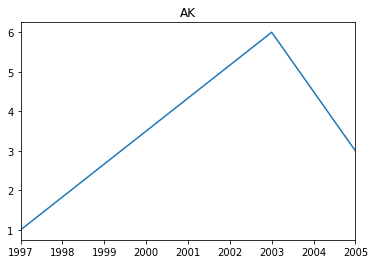

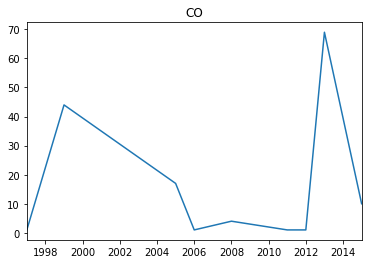

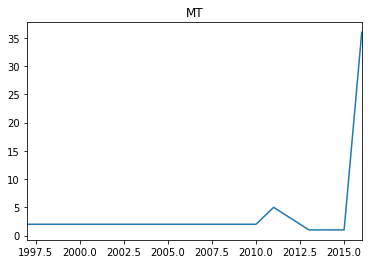

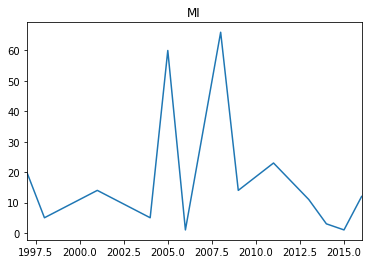

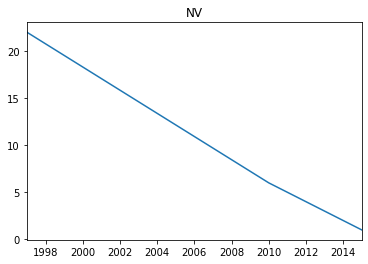

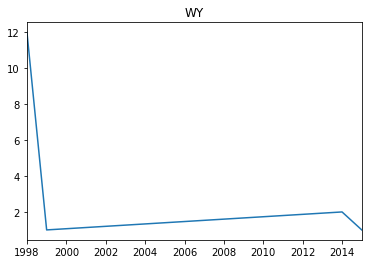

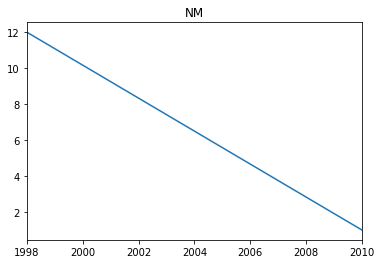

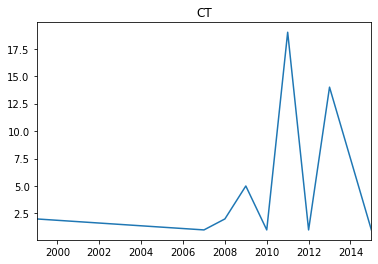

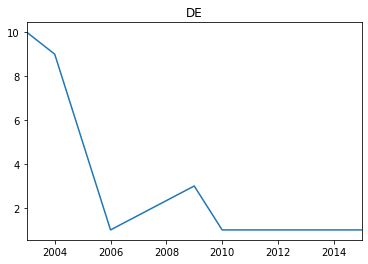

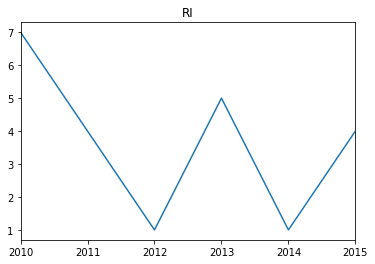

In [40]:
for name in list_states:
#     print(name)
#     print(df2[df2['School Name']==name])
        fig, ax = plt.subplots()
        try:
            df[df['State']==name]['Fiscal Year'].value_counts().sort_index().plot(ax=ax, label=name)
            plt.title(name)
        except:
            pass

In [ ]:
#finding peaks!

In [53]:
df[df['State']=='NJ']['Fiscal Year'].value_counts().idxmax()

2013

In [54]:
df[df['State']=='MO']['Fiscal Year'].value_counts().idxmax()

1993

In [ ]:
#making a database of states and peaks for easy mapping

In [ ]:
for name in list_states:
    df[df['State']=='NJ']['Fiscal Year'].value_counts().idxmax()
    

In [56]:
list_peaks =[]
for name in list_states:
    dict_peak = {}
    dict_peak['State'] = name
    dict_peak['Peak'] = df[df['State']==name]['Fiscal Year'].value_counts().idxmax()
    list_peaks+=[dict_peak]

In [61]:
df2 = pd.DataFrame(list_peaks)

In [62]:
df2

,State,Peak
0,KY,1997
1,MN,1997
2,NC,1999
3,UT,2012
4,VT,2011
5,AL,1996
6,AR,1996
7,IN,2008
8,IA,1993
9,MO,1993


In [ ]:
#funtion to map decades to coloers for easy mapping

In [66]:
def classify_decade(x):
    if int(x) < 1990:
        return 'blue'
    elif int(x) < 2000:
        return 'green'
    elif int(x) < 2010:
        return 'yellow'
    elif int(x) < 2017:
        return 'orange'

In [68]:
df2['color']=df2['Peak'].apply(lambda x: classify_decade(x))

In [ ]:
#save

In [71]:
df2.to_csv('color_buyouts.csv', index=False)